# Plotting centrality statistics

In this notebook, we want to create some plots to visualize the centrality statistics, especially the degree distributions.

---

In [1]:
import src.file_management as file_management
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.plot_utils as plot_utils
import statistics
import scipy.stats as stats
import powerlaw
from scipy.stats import lognorm
from scipy.stats import powerlaw as scpl
from scipy.optimize import curve_fit
import seaborn as sns
from matplotlib.ticker import MaxNLocator


In [2]:
data = {}
time_created = {}

---

## Total degree distribution

---

#### Loading data from JSON file:
We load the data from the most recently created json file that contains data for the degree distributions.

In [34]:
property_name= "degree_distribution_total"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object


#### Preparing data for plotting:

In [35]:
# Extract x and y lists:
x = list(data[property_name]['degree'].values())
y = list(data[property_name]['count(nodes)'].values())

#if we want a logarithmic plot we have to remove the degree 0 from data:
if x[0] == 0:
    x.pop(0)
    y.pop(0)


#### Creating the plot (first version, without estimated theoretical distribution) :

In [36]:
# Settings:
title = ""
#title = "Total degree distribution\n(Date: {})".format(time_created[property_name])
xlabel = "Node degree"
ylabel = "Number of nodes"
logarithmic = True
color = "darkblue"

Plot saved as plots/plot__degree_distribution_total__1612360088.pdf.


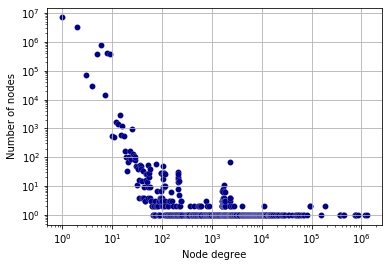

In [37]:
plt.scatter(x,y,color=color, edgecolors='w',linewidths=0.15)
plt.xscale('log')

#apply settings:
plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=logarithmic)
plt.grid()
#save to plots folder:
file_management.save_plot(property_name)

plt.show()


In [38]:
# We want to know the percentage of nodes with a degree lower than 10:

no_nodes_total = sum(y)

no_degree_smaller3 = sum(y[0:2])
percent_degree_smaller3 = no_degree_smaller3/no_nodes_total
print("{} nodes have degree 1 or 2. That accounts for {}% of all nodes.".format(no_degree_smaller3, percent_degree_smaller3))

no_degree_smaller10 = sum(y[0:9])
percent_degree_smaller10 = no_degree_smaller10/no_nodes_total
print("{} nodes have a degree smaller than 10. That accounts for {}% of all nodes.".format(no_degree_smaller10, percent_degree_smaller10))

print(y[0:9])
print(y[0:2])

10234523 nodes have degree 1 or 2. That accounts for 0.8316004874941689% of all nodes.
12293700 nodes have a degree smaller than 10. That accounts for 0.9989177720453669% of all nodes.
[7001534, 3232989, 69176, 30617, 381676, 758426, 14758, 412073, 392451]
[7001534, 3232989]


---

## In-degree distribution

---

#### Loading data from JSON file:
We load the data from the most recently created json file that contains data for the in-degree distribution.

In [3]:
property_name= "degree_distribution_in"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object


#### Preparing data for plotting:

In [4]:
# Extract x and y lists:
x_in = list(data[property_name]['in_degree'].values())
y_in = list(data[property_name]['count(nodes)'].values())

#if we want a logarithmic plot we have to remove the degree 0 from data:
if x_in[0] == 0:
    x_in.pop(0)
    y_in.pop(0)

#### Creating the plot:

In [5]:
# Settings:
#title = "In-degree distribution\n(Date: {})".format(time_created[property_name])
title = ""
xlabel = "In-degree"
ylabel = "Number of nodes"
logarithmic = True
color = "darkblue"

In [6]:
plt.scatter(x_in,y_in,color=color, edgecolors='w',linewidths=0.15)
plt.xscale('log')

#apply settings:
plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=logarithmic)
plt.grid()
#save to plots folder:
#file_management.save_plot(property_name)

plt.show()

In [29]:
# We want to know the percentage of certain occuring in-degrees 
# in the total set of nodes with positive in-degree

no_nodes_total = sum(y_in)
no_nodes_without_handles = no_nodes_total - 770407
print("total number of nodes with positive in-degre: ", no_nodes_total)

no_degree_1 = y_in[0]
percent_degree_1= 100*no_degree_1/no_nodes_total
print("{} nodes have in-degree 1. That accounts for {}% of all nodes with positive in-degree.".format(no_degree_1, percent_degree_1))

no_degree_1_without_handles = y_in[0] - 770367
percent_degree_1_without_handles = 100*no_degree_1_without_handles/no_nodes_without_handles
print("{} non-handle nodes have in-degree 1. That accounts for {}% of all non-handle nodes with positive in-degree.".format(no_degree_1_without_handles, percent_degree_1_without_handles))
 

no_degree_smaller3 = sum(y_in[0:2])
percent_degree_smaller3 = 100*no_degree_smaller3/no_nodes_total
print("{} nodes have in-degree 1 or 2. That accounts for {}% of all nodes with positive in-degree.".format(no_degree_smaller3, percent_degree_smaller3))

no_degree_smaller3_without_handles = sum(y_in[0:2]) - 770377
percent_degree_smaller3_without_handles = 100*no_degree_smaller3_without_handles/no_nodes_without_handles
print("{} non-handle nodes have in-degree 1 or 2. That accounts for {}% of all non-handle nodes.".format(no_degree_smaller3_without_handles, percent_degree_smaller3_without_handles))

print(y_in[0:8])
y_in[0:2]

total number of nodes with positive in-degre:  7339842
6984435 nodes have in-degree 1. That accounts for 95.15783854747826% of all nodes with positive in-degree.
6214068 non-handle nodes have in-degree 1. That accounts for 94.59060025709974% of all non-handle nodes with positive in-degree.
7272971 nodes have in-degree 1 or 2. That accounts for 99.08893134211881% of all nodes with positive in-degree.
6502594 non-handle nodes have in-degree 1 or 2. That accounts for 98.98254568315235% of all non-handle nodes.
[6984435, 288536, 30567, 18855, 5749, 2454, 1813, 1019]


[6984435, 288536]

---

## Out-degree distribution

---

#### Loading data from JSON file:
We load the data from the most recently created json file that contains data for the out-degree distribution.

In [20]:
property_name= "degree_distribution_out"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object


#### Preparing data for plotting:

In [21]:
# Extract x and y lists:
x_out = list(data[property_name]['out_degree'].values())
y_out = list(data[property_name]['count(nodes)'].values())

#if we want a logarithmic plot we have to remove the degree 0 from data:
if x_out[0] == 0:
    x_out.pop(0)
    y_out.pop(0)

#### Creating the plot:

In [22]:
# Settings:
title = ""
#title = "Out-degree distribution\n(Date: {})".format(time_created[property_name])
xlabel = "Out-degree"
ylabel = "Number of nodes"
logarithmic = True
color = "darkblue"

In [23]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(x_out,y_out,color=color, edgecolors='w',linewidths=0.15)
#plt.xscale('log')

#apply settings:
plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=logarithmic)
plt.grid()
#save to plots folder:
#file_management.save_plot(property_name)

plt.show()

In [28]:
# We want to know the percentage of certain occuring out-degrees 
# in the total set of nodes with positive out-degree

no_nodes_total = sum(y_out)

no_degree_2 = y_out[1]
percent_degree_2= no_degree_2/no_nodes_total
print("{} nodes have out-degree 2. That accounts for {}% of all nodes with positive out-degree.".format(no_degree_2, percent_degree_2))


no_degree_smaller3 = sum(y_out[0:2])
percent_degree_smaller3 = no_degree_smaller3/no_nodes_total
print("{} nodes have degree 1 or 2. That accounts for {}% of all nodes with positive out-degree.".format(no_degree_smaller3, percent_degree_smaller3))

no_degree_5_to_8 = sum(y_out[4:8])
percent_degree_5_to_8 = no_degree_5_to_8/no_nodes_total
print("{} nodes have a out-degree between 5 and 8. That accounts for {}% of all nodes with positive out-degree.".format(no_degree_5_to_8, percent_degree_5_to_8))

print("Hence, {}% of nodes have out-degree 1,2,5,6,7 or 8.".format(percent_degree_smaller3+percent_degree_5_to_8))
print(y_out[0:8])
print(y_out[4:8])
y_out[0:2]

2944818 nodes have out-degree 2. That accounts for 0.5132139408326222% of all nodes with positive out-degree.
3732986 nodes have degree 1 or 2. That accounts for 0.6505734670641808% of all nodes with positive out-degree.
1945920 nodes have a out-degree between 5 and 8. That accounts for 0.33912902995873295% of all nodes with positive out-degree.
Hence, 0.9897024970229138% of nodes have out-degree 1,2,5,6,7 or 8.
[788168, 2944818, 38018, 11741, 376022, 762235, 379886, 427777]
[376022, 762235, 379886, 427777]


[788168, 2944818]

---

## Configure table with node degree statistics per node label

Now we rouhgly examine the node degrees for different node labels. Due to the amount of labels and time restrictions, we only considered the minimal, maximal and average degree, as well as the standard deviation of the degree for each label. We downloaded the data as a csv file manually from the Neo4j browser and stored it manually. We load it here to configure some details, which we need so that the table is desplayed nicely in our Latex report.

In [48]:
# Read data to pandas dataframe:

nld_df = pd.read_csv('statistics/stats__node_label_degrees.csv')
print(nld_df.head())

            Label  NodeCount  MinRelCount  MaxRelCount  AvgRelCount  \
0        [handle]    5737658            0           21        3.532   
1           [url]    4342724            1       187164        1.140   
2         [title]     753949            1          110        1.006   
3  [metadata_url]     690989            1       187164        1.722   
4      [checksum]     540585            1         2779        1.508   

   StDevRelCount  
0          2.583  
1        110.211  
2          0.206  
3        276.024  
4         15.551  


In [49]:
# Clean the data:

for i in range(len(nld_df)):
    
    #remove square brackets from Labels:
    nld_df['Label'][i] = nld_df['Label'][i][1:-1]
    
    # underscores "_" would not be displayed in Latex but transform the subsequent character 
    # into an index of the preceeding character, so we have to replace all underscores 
    # by "latex readable" underscores "\_":
    #nld_df['Label'][i] = nld_df['Label'][i].replace("_", "\_")
    
    
nld_df = nld_df.rename(columns={'Label': 'node label', 
                                'NodeCount': 'node count', 
                                'AvgRelCount': 'sample mean', 
                                'MinRelCount': 'min degree',
                                'MaxRelCount': 'max degree', 
                                'StDevRelCount' : 'sample std dev'})

# for main latex document we don't need the complete table:
nld_df_cut = nld_df.drop(nld_df[nld_df['node count'] < 40].index)

nld_df_cut

/Users/ellyschmidt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


node label  node count  min degree  max degree  sample mean  \
0             handle     5737658           0          21        3.532   
1                url     4342724           1      187164        1.140   
2              title      753949           1         110        1.006   
3       metadata_url      690989           1      187164        1.722   
4           checksum      540585           1        2779        1.508   
5           filesize      174474           1      757552        9.009   
6            pubdate        9535           1       81062      204.969   
7           metadata        8826           1         154        1.021   
8               data        8826           1         154        1.021   
9             adm_md        6873           1          23        1.003   
10           tech_md        6867           1          23        1.003   
11           prov_md        6806           1          23        1.003   
12             index        5303           1          23        1.004   
13               bag        4246           1          23        1.005   
14           dataurl        1970           1           9        1.011   
15           metaurl        1763           1           4        1.002   
16               doi        1021           1           1        1.000   
17           landing         977           1           1        1.000   
18            source         904           1          80        1.812   
19         10320/loc         346           1           6        1.035   
20            cr_url         344           1           1        1.000   
21         colreg_id         321           1           1        1.000   
22           creator         229           1     1277895    18546.865   
23  creator_fullname         145           1          68        3.352   
24           authors         141           1     1189668     8458.525   
25       creator_uid         133           1       10795       91.414   
26     creator_email         126           1          91        4.587   
27       responsible          73           1        3073      123.466   
28   titles_DataCite          49           2           3        2.265   
29      creator_inst          46           1        1200       31.022   
30              inst          45           1      773485    43259.467   

    sample std dev  
0            2.583  
1          110.211  
2            0.206  
3          276.024  
4           15.551  
5         2026.858  
6         1869.020  
7            1.647  
8            1.647  
9            0.265  
10           0.265  
11           0.267  
12           0.302  
13           0.338  
14           0.223  
15           0.075  
16           0.000  
17           0.000  
18           4.030  
19           0.303  
20           0.000  
21           0.000  
22      117911.428  
23           8.765  
24      100186.535  
25         938.071  
26          12.401  
27         517.096  
28           0.446  
29         176.356  
30      143864.527

In [51]:
nld_df

node label  node count  min degree  max degree  sample mean  \
0                  handle     5737658           0          21        3.532   
1                     url     4342724           1      187164        1.140   
2                   title      753949           1         110        1.006   
3            metadata_url      690989           1      187164        1.722   
4                checksum      540585           1        2779        1.508   
..                    ...         ...         ...         ...          ...   
213              director           1           1           1        1.000   
214              function           1           1           1        1.000   
215          creationDate           1           0           0        0.000   
216  lastModificationDate           1           0           0        0.000   
217                 orcid           1           1           1        1.000   

     sample std dev  
0             2.583  
1           110.211  
2             0.206  
3           276.024  
4            15.551  
..              ...  
213           0.000  
214           0.000  
215           0.000  
216           0.000  
217           0.000  

[218 rows x 6 columns]

In [50]:
# Save cleaned data:
nld_df.to_csv('statistics/stats__node_label_degrees__cleaned_complete.csv', index=False, float_format='%.3f')
nld_df_cut.to_csv('statistics/stats__node_label_degrees__cleaned_cut.csv', index=False, float_format='%.3f')

---

## Configure table with dominant nodes by degree

Likewiese, for the list of dominant nodes (by degree) we downloaded the data as a csv file from the Neo4j browser and stored it manually in the statistics folder. We load it here to configure some details, which we need so that the table is desplayed nicely in our Latex report.

In [36]:
# Read data to pandas dataframe:

dominant_nodes_df = pd.read_csv('statistics/stats__dominant_nodes__raw.csv')
print(dominant_nodes_df.head())

    degree       label           nodeId       id
0  1277895   [creator]      creator001M  6620800
1  1189668   [authors]  authorsTextGrid    15060
2   873231   [creator]      creator001Z  9167786
3   773485      [inst]         inst1000   667104
4   757552  [filesize]       filesize-1  2449055


In [37]:
# Clean the data:

for i in range(len(dominant_nodes_df)):
    #remove square brackets from labels:
    dominant_nodes_df['label'][i] = dominant_nodes_df['label'][i][1:-1]
print(len(dominant_nodes_df))
    
# for main latex document we don't need the complete table:
dominant_nodes_df_cut = dominant_nodes_df.drop(dominant_nodes_df[dominant_nodes_df['degree'] < 100000].index)
#dominant_nodes_df_cut = dominant_nodes_df.drop(index=np.arange(30,len(dominant_nodes_df))) # cut by index

dominant_nodes_df_cut

100


/Users/ellyschmidt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


degree         label                                             nodeId  \
0   1277895       creator                                        creator001M   
1   1189668       authors                                    authorsTextGrid   
2    873231       creator                                        creator001Z   
3    773485          inst                                           inst1000   
4    757552      filesize                                         filesize-1   
5    733154       creator                                        creator1734   
6    447715          inst                                           instMPDL   
7    429654          inst                                           inst1016   
8    377872      filesize                                        filesize248   
9    373701       creator  creatorPID Service pid-webapp-4.8.1-BETA.20161...   
10   373205       creator   creatorPID Service pid-webapp-4.4.0.201603091338   
11   187164  metadata_url        metadata_urlhttps://testitest/1234/metadata   
12   187164           url                          urlhttps://testitest/1234   
13   158221       creator  creatorPID Service pid-webapp-4.9.3-SNAPSHOT.2...   

         id  
0   6620800  
1     15060  
2   9167786  
3    667104  
4   2449055  
5   2449048  
6   9132260  
7     14231  
8     17202  
9    261398  
10  4679310  
11   264522  
12   264521  
13   321421

In [38]:
dominant_nodes_df

degree     label             nodeId       id
0   1277895   creator        creator001M  6620800
1   1189668   authors    authorsTextGrid    15060
2    873231   creator        creator001Z  9167786
3    773485      inst           inst1000   667104
4    757552  filesize         filesize-1  2449055
..      ...       ...                ...      ...
95     9332      inst           inst1002      154
96     9161   pubdate  pubdate2012-12-13  4308004
97     9149   pubdate  pubdate2012-11-24  3825076
98     8972   pubdate  pubdate2017-04-19   402731
99     8879   pubdate  pubdate2012-01-21  2759929

[100 rows x 4 columns]

In [39]:
# Save cleaned data:
dominant_nodes_df.to_csv('statistics/stats__dominant_nodes__cleaned_complete.csv', index=False, float_format='%.3f')
dominant_nodes_df_cut.to_csv('statistics/stats__dominant_nodes__cleaned_cut.csv', index=False, float_format='%.3f')

## Graph coverage of the dominant nodes

Here, we plot the number k of the k most dominant nodes vs the amount of nodes in the set of neighbors of the k most dominant nodes. This gives an indication about how much of the graph is "covered" by the most dominant nodes. We can with this make statements like "70% of all nodes have a connection to at least on of the i most dominant nodes.

#### Loading data from JSON file:

In [47]:
property_name= "dominant_nodes_coverage"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object
property_name= "dominant_nodes_handle_coverage"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object

In [48]:
print(data["dominant_nodes_coverage"])

# compute relative numbers:
abs_numbers = list(data["dominant_nodes_coverage"].values())
abs_numbers_handles = list(data["dominant_nodes_handle_coverage"].values())

node_count = 12307126 # total number of nodes on the same day as when the
                        # graph coverage of dominant nodes was fetched (January 4, 2021)
handle_node_count = 5737658

rel_numbers = [covered_node_count/node_count for covered_node_count in abs_numbers]
rel_numbers_handles = [covered_node_count/handle_node_count for covered_node_count in abs_numbers_handles]


print(rel_numbers)
print(rel_numbers_handles)

quantile_50 = next(x[0] for x in enumerate(rel_numbers_handles) if x[1] > 0.5)
quantile_75 = next(x[0] for x in enumerate(rel_numbers_handles) if x[1] > 0.75)
quantile_855 = next(x[0] for x in enumerate(rel_numbers_handles) if x[1] > 0.855)
print("0.5: ", quantile_50)
print("0.75: ", quantile_75)
print("0.855: ", quantile_855)




{'1': 1277895, '2': 2467563, '3': 3340794, '4': 3717891, '5': 3720491, '6': 3720496, '7': 4168211, '8': 4559537, '9': 4559537, '10': 4559537, '11': 4559537, '12': 4559537, '13': 4559537, '14': 4559537, '15': 4559537, '16': 4559537, '17': 4559537, '18': 4559537, '19': 4559537, '20': 4559537, '21': 4626820, '22': 4626820, '23': 4626820, '24': 4680089, '25': 4680089, '26': 4680089, '27': 4680089, '28': 4720096, '29': 4720096, '30': 4720096, '31': 4750087, '32': 4750088, '33': 4754822, '34': 4780963, '35': 4805561, '36': 4805561, '37': 4826733, '38': 4846998, '39': 4867218, '40': 4886062, '41': 4886062, '42': 4886062, '43': 4886062, '44': 4902226, '45': 4902226, '46': 4902226, '47': 4902226, '48': 4917081, '49': 4917081, '50': 4917081, '51': 4917081, '52': 4917081, '53': 4917081, '54': 4917081, '55': 4917081, '56': 4917081, '57': 4917081, '58': 4917081, '59': 4917081, '60': 4917081, '61': 4917081, '62': 4917081, '63': 4917081, '64': 4917081, '65': 4917081, '66': 4917081, '67': 4917081, '68

#### Creating the plot:

Plot saved as plots/plot__dominant_nodes_coverage__1612360132.pdf.


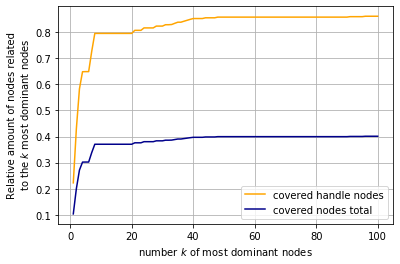

In [49]:
# Settings:
title = ""
#title = "Graph coverage by dominant nodes\n(Date: {})".format(time_created["dominant_nodes_handle_coverage"])
xlabel = "number $k$ of most dominant nodes"
ylabel = "Relative amount of nodes related\n to the $k$ most dominant nodes"
color = "darkblue"
logarithmic = False

x = [int(k) for k in data["dominant_nodes_coverage"].keys()]
y = rel_numbers
y2 = rel_numbers_handles

plt.plot(x, y2, color="orange", label="covered handle nodes")
plt.plot(x, y, color=color, label="covered nodes total")


#apply settings:
plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=logarithmic)
plt.grid()
plt.legend()

#save to plots folder:
file_management.save_plot("dominant_nodes_coverage")

plt.show()

---
### Degree distribution of the URL nodes:

#### Loading data from JSON file:

In [76]:
property_name = "url_degree_distribution"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object


#### Preparing data for plotting:

In [77]:
# Extract x and y lists:
x = list(data["url_degree_distribution"]['degree'].values())
y = list(data["url_degree_distribution"]['count(nodes)'].values())

print("x: ", x)
print("y: ", y)

x:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 36, 37, 38, 40, 43, 46, 47, 48, 50, 53, 55, 56, 70, 72, 77, 78, 81, 93, 95, 97, 101, 102, 103, 105, 107, 110, 116, 126, 129, 154, 198, 208, 209, 210, 211, 212, 213, 214, 215, 241, 520, 552, 593, 609, 859, 860, 1600, 1605, 1607, 1620, 1627, 1628, 1640, 1649, 1651, 1652, 1674, 1675, 1677, 1695, 1699, 1703, 1718, 1722, 1724, 1725, 1748, 1772, 1775, 1778, 1790, 1797, 1798, 1816, 1827, 1830, 1838, 1848, 9996, 93523, 93532, 187164]
y:  [4256031, 68228, 10348, 5389, 475, 364, 474, 173, 89, 77, 84, 71, 117, 41, 36, 54, 63, 14, 32, 1, 20, 31, 52, 11, 50, 11, 12, 11, 31, 10, 2, 10, 21, 11, 10, 1, 1, 2, 10, 1, 10, 20, 10, 11, 1, 1, 20, 1, 1, 10, 1, 10, 2, 1, 10, 20, 10, 10, 10, 1, 1, 1, 1, 10, 3, 6, 4, 5, 9, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Creating the plot (first version, without estimated theoretical distribution) :

Plot saved as plots/plot__url_degree_distribution__1609862518.pdf.


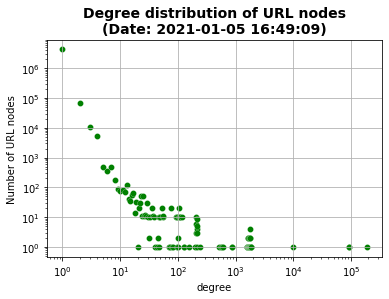

In [78]:
# Settings:
title = "Degree distribution of URL nodes\n(Date: {})".format(time_created["url_degree_distribution"])
xlabel = "degree"
ylabel = "Number of URL nodes"
logarithmic = True
color = "green"

plt.scatter(x, y, color=color, edgecolors='w', linewidths=0.2)
plt.xscale('log')

#apply settings:
plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=logarithmic)
plt.grid()

#save to plots folder:
file_management.save_plot(property_name)

plt.show()
